<a href="https://colab.research.google.com/github/ChWasam/Cloud-Applied-Generative-AI-Engineering-Complete-Guide/blob/master/Cloud_Generative_AI/jupyter%20notebook/Beginners_Guide_Wasam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a Heading
This is some text in **bold** and *italic*.
* wasam


In [ ]:
 %timeit print("Hello World")

In [ ]:
 %%time
 print("Hello World")

Hello World
CPU times: user 204 µs, sys: 0 ns, total: 204 µs
Wall time: 2.18 ms


# Working with data

In [ ]:
import pandas as pd

# Load a dataset (for example, an inbuilt dataset)
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Display the first few rows of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
%matplotlib inline

In [ ]:
%timeit sum(range(1000))


102 µs ± 19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


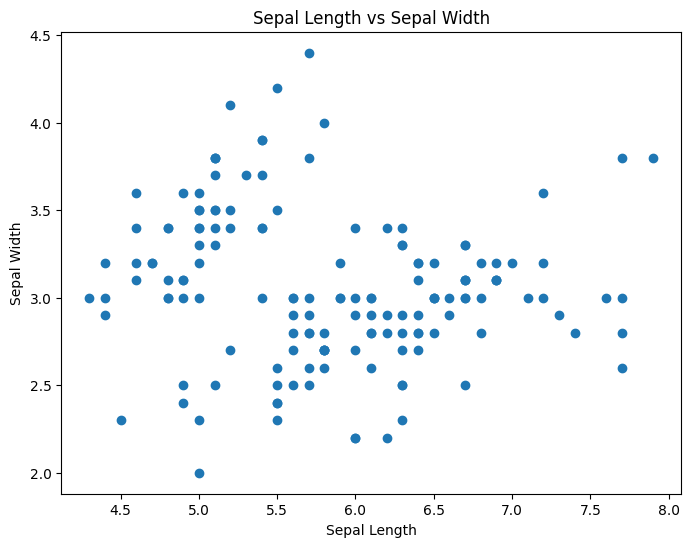

In [ ]:
import matplotlib.pyplot as plt

# Create a simple scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
%timeit sum(range(1000))

The slowest run took 7.96 times longer than the fastest. This could mean that an intermediate result is being cached.
231 µs ± 172 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%time
sum(range(1000))
print("Done")

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs
Done


In [ ]:
%matplotlib inline

In [ ]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(min=0, max=10, value=5)
display(slider)

IntSlider(value=5, max=10)

# Upload file

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving downloadedImage (1).png to downloadedImage (1).png


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.0 MB/s eta 0:00:00


100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 60.0GB/s]


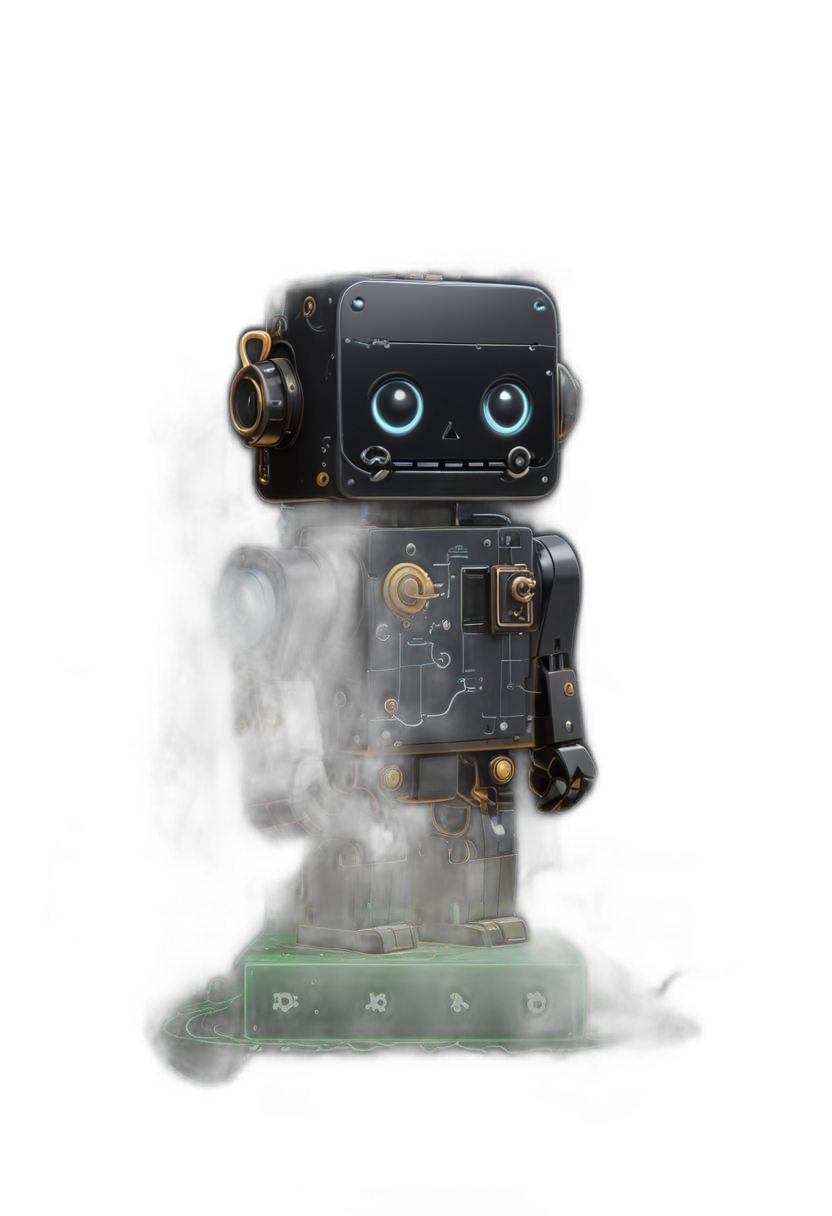

In [ ]:
# prompt: Remove background of the bot in the picture

!pip install rembg
from rembg import remove
from PIL import Image
import io

# Assuming 'image.jpg' is the uploaded image file
image_bytes = list(uploaded.values())[0]
image = Image.open(io.BytesIO(image_bytes))

# Remove the background
output = remove(image)

# Save the output image
output.save("output.png")

# Display the output image
display(output)


Saving downloadedImage (1).png to downloadedImage (1) (1).png


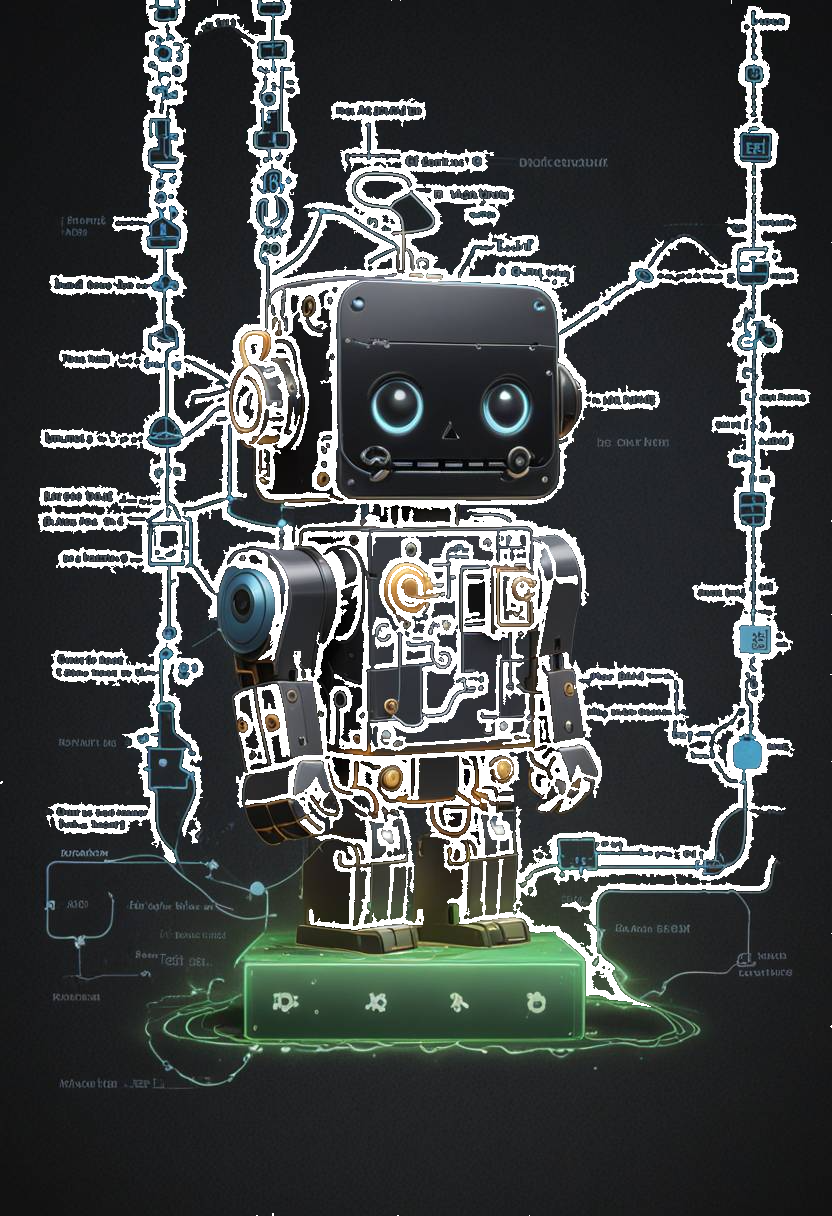

In [ ]:
# prompt: Write a code to refine a picture above and remove the smoke and enhace picture

from PIL import Image
from google.colab import files
import io
import numpy as np
import cv2

# Upload the image
uploaded = files.upload()

# Get the image bytes
image_bytes = list(uploaded.values())[0]
image = Image.open(io.BytesIO(image_bytes))

# Convert the image to a NumPy array
image_np = np.array(image)

# Convert the image to grayscale
gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to create a binary image
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask to remove the smoke
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Apply the mask to the original image
result = cv2.bitwise_and(image_np, image_np, mask=mask)

# Enhance the image (optional)
# You can apply various enhancement techniques here, such as:
# - Increasing contrast
# - Sharpening
# - Color correction

# Convert the result back to a PIL Image
result_image = Image.fromarray(result)

# Display the refined image
display(result_image)


In [ ]:
from platform import python_version
import torch
print("Python version", python_version())
print("Pytorch - version", torch.__version__)
print("Pytorch - cuDNN version :", torch.backends.cudnn.version())

Python version 3.10.12
Pytorch - version 2.4.0+cu121
Pytorch - cuDNN version : 90100


# **GPU**

In [ ]:
!nvidia-smi

Thu Sep 12 11:42:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install gpustat


In [ ]:
!gpustat

a0de1d2de805  Thu Sep 12 11:43:25 2024  535.104.05
[0] Tesla T4 | 37°C,   0 % |     0 / 15360 MB |


# Data uploading to VM
1. From Machine  -- explore the built in left panel of google colab
2. From google drive -- explore the built in  left panel  of google colab
3. with wget

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget  https://dl.fbaipublicfiles.com/XLM/codes_xnli_100

--2024-09-12 12:03:02--  https://dl.fbaipublicfiles.com/XLM/codes_xnli_100
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.164.78.121, 18.164.78.81, 18.164.78.128, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.164.78.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2973279 (2.8M) [text/plain]
Saving to: ‘codes_xnli_100’

codes_xnli_100      100%[===================>]   2.83M  6.38MB/s    in 0.4s    

2024-09-12 12:03:03 (6.38 MB/s) - ‘codes_xnli_100’ saved [2973279/2973279]



In [ ]:
!ls -l

total 5536
-rw-r--r-- 1 root root 2973279 Aug 18  2019  codes_xnli_100
-rw-r--r-- 1 root root 1100487 Sep 12 11:18 'downloadedImage (1) (1).png'
-rw-r--r-- 1 root root 1100487 Sep 12 11:17 'downloadedImage (1).png'
-rw-r--r-- 1 root root  483632 Sep 12 11:18  output.png
drwxr-xr-x 1 root root    4096 Sep 10 13:28  sample_data


In [ ]:
!head -n 10 codes_xnli_100

a n 58300410
e r 55874871
e n 48332651
i n 46367809
a r 42047014
s t 41963553
a l 34495577
e n</w> 33743928
o n 30604783
o r 30086868


In [ ]:
!git clone https://github.com/ntunlp/MH6812-SPMS-2019

Cloning into 'MH6812-SPMS-2019'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


# Additional

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
from google.colab import files
files.download('/content/sample_data/california_housing_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
print("Advance level Google Colab")

Advance level Google Colab
